# Lab 2 Notebook: Standard Deviation and the Frank-Hertz experiment
written by Marshall Campbell marshaac@uci.edu

This notebook will attempt to simulate Physics 52C Lab 2. Only edit cells where explicitly indicated.

#### Premise:
The Frank-Hertz experiment involves accelerating electrons through a chamber of mercury vapor from a cathode to a perforated anode. Beyond the anode, a retarding potential is applied between the perforated anode and the collecting plate. This retarding potential ensures that only electrons with energy above some threshold energy will contribute to the measured current carried from the collecting plate to the picoammeter. As the electron energy increases, more electrons will surpass the threshold energy neccessary to reach the collector plate, thus increasing the measured current. However, once the electrons have sufficient energy some electrons will collide with the mercury atoms and lose some of their energy by exciting the elctrons bound to the mercury atoms to a higher energy level. After losing this energy, they will not have enough to reach the collector plate. This is demonstrated via a marked drop in the measured current. As the accelerating voltage is increeased further, the current will again increase until the electrons have enough energy to undergo a second consecutive collision and a second drop in current will be observed. Thus, as we increase the accellerating voltage of the electrons through this aparatus, we should observe an oscillatory behavior in the current measured from the collector plate.

Classically, we might expect that the energy lost by the elctrons during the collision would be a continuous distribution, but what we observe in this experiment is discrete intervals between successive drops in the measured current, indicating that the electrons are losing a quantized amount of energy during each collision! This experiment demonstrated that energy levels of bound electrons are indeed discrete and earned J. Frank and G. Hertz the nobel prize in 1925.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

### Here is an array of the raw data one would get from a typical Frank-Hertz experiment. Below this is the data plotted. These may be useful when finding maxima and minima. 

In [4]:
df = pd.read_csv('FrankHertzData.csv')
df.columns = ['voltage', 'current']
voltage = df.voltage.to_numpy()
current = df.current.to_numpy()

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

       voltage   current
0     1.152454  0.000257
1     1.944399  0.012319
2     3.025192  0.000629
3     4.105250  0.012748
4     5.113279  0.024853
5     5.905224  0.036915
6     6.912519  0.072829
7     7.920916  0.073029
8     9.000974  0.085148
9    10.080664  0.109172
10   11.014461  0.192690
11   11.588850  0.252328
12   12.380060  0.288199
13   13.173842  0.240738
14   14.039285  0.205195
15   14.900685  0.300604
16   15.690792  0.372189
17   15.830807  0.503170
18   15.827499  0.610312
19   16.185804  0.669907
20   16.978116  0.670064
21   17.630046  0.551146
22   18.065156  0.455994
23   18.355475  0.384623
24   19.362769  0.420537
25   19.863293  0.539684
26   19.788325  0.634907
27   20.288481  0.765959
28   20.428863  0.885034
29   20.641273  1.004124
30   20.853316  1.135119
31   20.995167  1.206575
32   21.282178  1.242346
33   21.572497  1.170976
34   21.718391  1.111481
35   22.007240  1.087728
36   22.156441  0.921091
37   22.376936  0.778278
38   22.666152  0.742621


### In the following cell you may adjust xlim and ylim to focus on a certain part of the plotted data. Feel free to also copy the above data to excel or use with some other program if easier to find minima and maxima outside of this notebook, but enter your results to this notebook at the bottom. 

<Figure size 432x288 with 0 Axes>

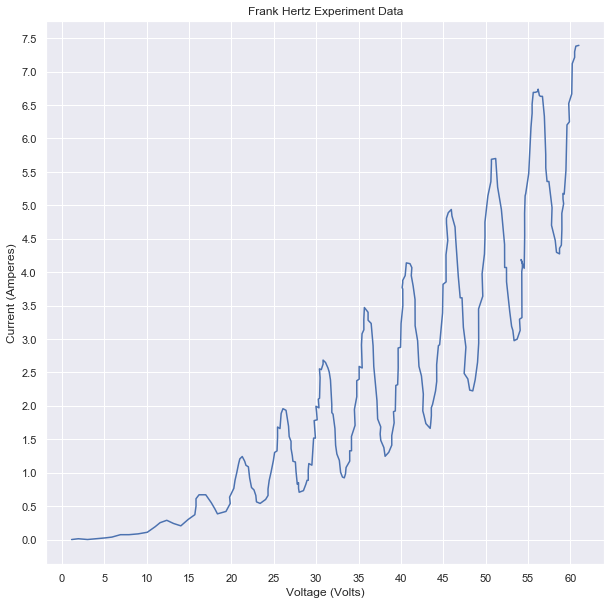

In [5]:
###################################################################################################################
### Adjust the range of the graph axes, this will help you find maxima and minima by eye.                              ###
### To see the full plot, set the values to [None,None].                                                       ###
###################################################################################################################

xlim = [None,None]
ylim = [None,None]

################################# DO NOT ADJUST ANYTHING ELSE IN THE CELL #########################################
fig = plt.figure()
plt.figure(figsize=(10,10))
plt.plot(voltage,current)
plt.ylim(ylim)
plt.xlim(xlim)

if xlim != [None,None]:
    plt.xticks(np.arange(xlim[0], xlim[1], (xlim[1]-xlim[0])/10)) 
else:
    plt.xticks(np.arange(0,65,5))
    
    
if ylim != [None,None]:
    plt.yticks(np.arange(ylim[0], ylim[1], (ylim[1]-ylim[0])/10))
else:
    plt.yticks(np.arange(0,8,0.5))

plt.xlabel('Voltage (Volts)')
plt.ylabel('Current (Amperes)')
plt.title('Frank Hertz Experiment Data')
plt.show()

### We need to find the voltages that correspond to the maxima and minima in current. We can find these by taking the 'derivative' of this curve. Since this is a discrete data set, this will correspond to a discrete array of $\Delta I/\Delta V$.

### I also cleaned up the data to make the graph of the derivative look better

In [6]:
### Calculate dI/dV. Exclude values where V(i+1) < V(i); the centered formular for numerical derivative gives the best result ###

dIdV = np.array([])

for i in range(len(voltage)-1):
    if voltage[i+1] > voltage[i]:
        dIdVval = (current[i+1] - current[i-1])/2/(voltage[i+1] - voltage[i-1])
        dIdV = np.append(dIdV, dIdVval)

In [7]:
### delete values of voltage where dI/dV was not calculated. ###
### Also delete last value from voltage - derivative cannot be calculated here. ###

dind = np.empty(0, int)
for i in range(len(voltage)-1):
    if voltage[i+1] < voltage[i]:
        dindval = np.argwhere(voltage == voltage[i+1])
        dind = np.append(dind, dindval)
tempvolt = np.delete(voltage, len(voltage)-1)
tempvolt = np.delete(tempvolt,dind)

In [8]:
### Delete outliers to make graph look better. (|dI/dV| > 3) ###
od = np.argwhere(np.abs(dIdV) > 3)
dIdV = np.delete(dIdV, od)
tempvolt = np.delete(tempvolt, od)

### Here you will find an array of voltages and the 'derivatives' and the corresponding plot. Remember, because this a discrete data set, two values are neccessary to compute the derivative. We used a centered formula for the derivatives so the first voltage $V_0$ corresponds to $(1/2)(I_{2}-I_{0})/(V_{2}-V_{0})$. 

### Use this along with the plot above to find the voltages at the local maxima. Then find the voltage difference between consecutive maxima. Compute the average and standard deviation of the voltage differences. Repeat for the local minima. 

### I have included a blank cell below the plot of dI/dV if you would like to do your calculations there. You may also do them in your calculator, mathematica, or whatever computing software you prefer.

In [9]:
dva = np.array((tempvolt,dIdV)).T
derivdf = pd.DataFrame(dva, columns=['Voltage', 'dI/dV'])

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(derivdf)

       Voltage     dI/dV
0     1.152454  0.062494
1     1.944399  0.000099
2     3.025192  0.000099
3     4.105250  0.005800
4     5.113279  0.006713
5     5.905224  0.013332
6     6.912519  0.008958
7     7.920916  0.002949
8     9.000974  0.008367
9    10.080664  0.026706
10   11.014461  0.047460
11   11.588850  0.034970
12   12.380060 -0.003656
13   13.173842 -0.025013
14   14.039285  0.017334
15   14.900685  0.050558
16   15.690792  0.108892
17   15.830807  0.234843
18   16.185804  0.025965
19   16.978116 -0.041115
20   17.630046 -0.098465
21   18.065156 -0.114775
22   18.355475 -0.013662
23   19.362769  0.051419
24   19.863293  0.266088
25   20.288481  0.195248
26   20.428863  0.337543
27   20.641273  0.294596
28   20.853316  0.286033
29   20.995167  0.125014
30   21.282178 -0.030831
31   21.572497 -0.150002
32   21.718391 -0.095743
33   22.007240 -0.217315
34   22.156441 -0.418519
35   22.376936 -0.175070
36   22.666152 -0.117103
37   22.884810 -0.303981
38   22.959778 -0.117103


### The cell below plots the derivative. Note that zero crossing of derivatives happen at both minima and maxima. The value of Δ𝑉 for this lab is the difference between two minima or two maxima, not the difference between minima and maxima. Therefore if using derivative skip every other zero to calculate the difference.

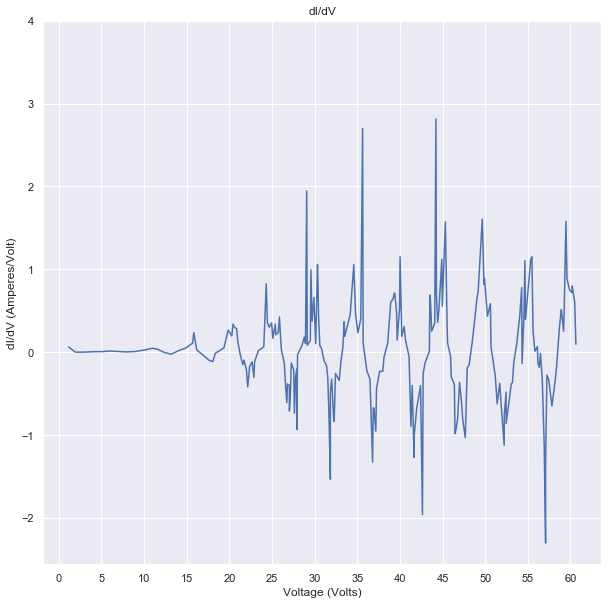

In [10]:
###################################################################################################################
### Adjust the range of the graph axes, this will help you find maxima and minima.                              ###
### To see the full plot, set the values to "None, None".                                                       ###
###################################################################################################################

xlim2 = [None,None]
ylim2 = [None,None]

############################# DO NOT ADJUST ANYTHING ELSE IN THE CELL #############################################fig = plt.figure()
plt.figure(figsize=(10,10))
plt.plot(tempvolt,dIdV)
plt.ylim(ylim2)
plt.xlim(xlim2)


if xlim2 != [None,None]:
    plt.xticks(np.arange(xlim2[0], xlim2[1], (xlim2[1]-xlim2[0])/10)) 
else:
    plt.xticks(np.arange(0,65,5))
    
if ylim2 != [None,None]:
    plt.yticks(np.arange(ylim2[0], ylim2[1], (ylim2[1]-ylim2[0])/10))
else:
    plt.yticks(np.arange(-2,5,1))
    
plt.xlabel('Voltage (Volts)')
plt.ylabel('dI/dV (Amperes/Volt)')
plt.title('dI/dV')
plt.show()

### The cell bellow is left blank for you to compute the voltage differences between sucessive minima/maxima and to enter your results. You may also use a calculator, excel, mathematica, or whatever computing software you prefer to gather these voltage differences. 

### Best to ignore all noise data below 10 V and concentrate on 10 to 60V. Note a noise related zero crossing around 54V

### Make two histograms of Δ𝑉-min and Δ𝑉-max using differences of minima or differences of maxima in the V vs I data to see what the distribution of your measured Δ𝑉 values look like. 

### If you are using excel or some other program to measure the differecnes and plot you can save those plots as png or jpeg in excel or other program and insert to this notebook using "insert image" option under "Edit" button in the Jupyter menu

### Workout mean, standard deviation, and standard error of mean for your measurements for minima and maxima, and for combined minima and maxima and enter those in cell below.

## The above method was more of a manual method. Python packages allow us to do everything more automatically. This is demonstrated below.

First, we find the indices of the relative extrema in the measured current data set. I found the nifty routine argrelextrema from scipy which makes this very easy. This routine will output the indices off all points which are greater than their nearest neighbors. More info on it may be found [here](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.argrelextrema.html)

In [11]:
from scipy.signal import argrelextrema
Imax = argrelextrema(current,np.greater,0,2)

Next, we create an array of the voltage values that correspond to these indices:

In [12]:
ImaxVolts = np.array([])

for i in range(len(Imax[0])):
    v = voltage[Imax[0][i]]
    ImaxVolts = np.append(ImaxVolts, v)

Finally, we calculate the difference between succesive voltage values:

In [13]:
Voltage_Difference_max = np.array([])

for i in range(len(ImaxVolts)-1):
    dv = ImaxVolts[i+1] - ImaxVolts[i]
    Voltage_Difference_max = np.append(Voltage_Difference_max, dv)

Repeat this process for the minima. Note the notch in the data around 54 volts: I had to selectively delete that minimum from my array of minima

In [14]:
Imin = argrelextrema(current,np.less,0,3)
Imin = np.delete(Imin, 9)

IminVolts = np.array([])

for i in range(len(Imin)):
    vmin = voltage[Imin[i]]
    IminVolts = np.append(IminVolts, vmin)
    
    Voltage_Difference_min = np.array([])

for i in range(len(IminVolts)-1):
    dvmin = IminVolts[i+1] - IminVolts[i]
    Voltage_Difference_min = np.append(Voltage_Difference_min, dvmin)

Now we produce two histogram plots of the distributions for minima and maxima

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8F1B47E08>]],
      dtype=object)

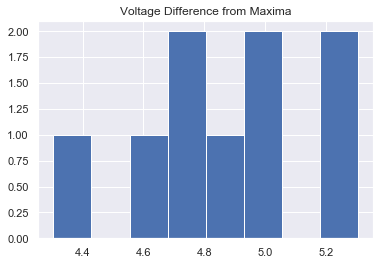

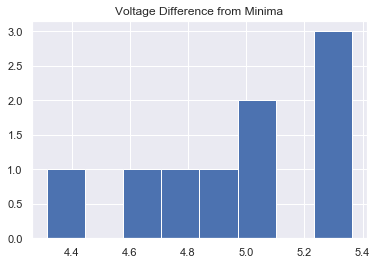

In [15]:
DeltaVmax = pd.DataFrame(Voltage_Difference_max)
Plot1 = DeltaVmax.rename(columns={0:'Voltage Difference from Maxima'})
DeltaVmin = pd.DataFrame(Voltage_Difference_min)
Plot2 = DeltaVmin.rename(columns={0:'Voltage Difference from Minima'})

Plot1.hist(label = 'eV',bins=8)
Plot2.hist(label = 'eV',bins=8)

Then we find the mean, standard deviation, and standard error of mean for both maxima/minima separately:

### For the minima we get:

In [16]:
minmean = DeltaVmax.mean()[0]
print('Mean: {} V'.format(minmean))

Mean: 4.867835698550653 V


In [17]:
minstd = DeltaVmax.std()[0]
print('Standard Deviation: {} V'.format(minstd))

Standard Deviation: 0.30948012037916706 V


In [18]:
minsem = DeltaVmax.sem()[0]
print('Standard Error of Mean: {} V'.format(minsem))

Standard Error of Mean: 0.10316004012638902 V


### And for the minima:

In [19]:
maxmean = DeltaVmin.mean()[0]
print('Mean: {} V'.format(maxmean))

Mean: 4.9640368553328145 V


In [20]:
maxstd = DeltaVmin.std()[0]
print('Standard Deviation: {} V'.format(maxstd))

Standard Deviation: 0.3535814068753885 V


In [21]:
maxsem = DeltaVmin.sem()[0]
print('Standard Error of Mean: {} V'.format(maxsem))

Standard Error of Mean: 0.11786046895846285 V


Now, we can combine all our voltage difference data for the maxima and minima

In [22]:
alldV = np.append(Voltage_Difference_min, Voltage_Difference_max)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8F1C01FC8>]],
      dtype=object)

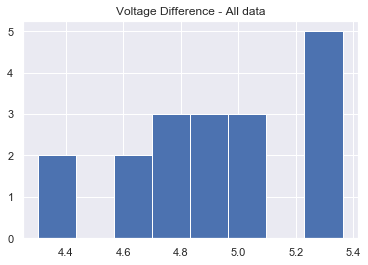

In [23]:
DeltaVall = pd.DataFrame(alldV)
Plot = DeltaVall.rename(columns={0:'Voltage Difference - All data'})

Plot.hist(label = 'eV',bins=8)

### Our combined $\Delta V$ data yields:

In [24]:
mean = DeltaVall.mean()[0]
print('Mean: {} V'.format(mean))

Mean: 4.915936276941735 V


In [25]:
std = DeltaVall.std()[0]
print('Standard Deviation: {} V'.format(std))

Standard Deviation: 0.3261205146361297 V


In [26]:
sem = DeltaVall.sem()[0]
print('Standard Error of Mean: {} V'.format(sem))

Standard Error of Mean: 0.07686734246108468 V


&nbsp;


&nbsp;


&nbsp;


&nbsp;


&nbsp;



### Questions :

1) Is the standard deviation of the $\Delta V$ you worked out using the plots and the arrays close to the $\Delta V$ calculated by the scipy routine? Should it be?

2) Why is the procedure we used of averaging several measurement of both maxima and minima better than a single measurment of the excitation potential? Why is it better than just measuring the minima?

3) In this experiment, you measured the current as a function of voltage. Does the Frank-Hertz tube obey Ohm's law? Explain. 

4) Figure 2.1 shows two transitions to the ground state corresponding to 4.9 eV and 6.7 eV. Explain why only the 4.9 eV state is observed in this experiment and why we do not see the 6.7 eV state.